In [82]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [83]:
model = torch.load('../data storage/prm_data_L8_FCNN.pth')
model

OrderedDict([('fc1.weight',
              tensor([[-0.0848, -0.0595,  0.0874,  ..., -0.0434, -0.0412,  0.0606],
                      [-0.0915,  0.1127, -0.0697,  ...,  0.0703,  0.0686, -0.0753],
                      [ 0.0221, -0.0746, -0.0400,  ..., -0.0594, -0.0429, -0.1034],
                      ...,
                      [-0.0920,  0.0338, -0.0117,  ...,  0.0440, -0.1226, -0.1059],
                      [ 0.0649, -0.1096, -0.1027,  ..., -0.0389, -0.0123,  0.0218],
                      [-0.0427,  0.0371, -0.0920,  ..., -0.0940, -0.0798,  0.0136]])),
             ('fc2.weight',
              tensor([[-0.0591,  0.0132, -0.0457,  ..., -0.1656, -0.1167, -0.0102],
                      [ 0.0798, -0.0003, -0.0477,  ..., -0.1145, -0.0917, -0.0674],
                      [-0.0066,  0.0423, -0.1100,  ..., -0.1055,  0.0438, -0.1209],
                      ...,
                      [-0.1035, -0.2021, -0.0142,  ...,  0.0185, -0.0478, -0.0880],
                      [-0.0391, -0.1916,  0.104

In [84]:
fc_weight = model['fc2.weight']
fc_weight

tensor([[-0.0591,  0.0132, -0.0457,  ..., -0.1656, -0.1167, -0.0102],
        [ 0.0798, -0.0003, -0.0477,  ..., -0.1145, -0.0917, -0.0674],
        [-0.0066,  0.0423, -0.1100,  ..., -0.1055,  0.0438, -0.1209],
        ...,
        [-0.1035, -0.2021, -0.0142,  ...,  0.0185, -0.0478, -0.0880],
        [-0.0391, -0.1916,  0.1046,  ...,  0.0258, -0.0788,  0.1040],
        [-0.1016, -0.2079,  0.0804,  ...,  0.0394,  0.0955,  0.0460]])

In [85]:
fc_weight.size()

torch.Size([100, 80])

In [86]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [87]:
fc_weight_np_square

array([[-0.0590744 ,  0.07978287, -0.00656403, ..., -0.10351377,
        -0.03912362, -0.10160756],
       [ 0.01316919, -0.00034558,  0.04229115, ..., -0.20214759,
        -0.19158843, -0.20785956],
       [-0.04572181, -0.04769693, -0.10995285, ..., -0.01423629,
         0.10462868,  0.08035517],
       ...,
       [-0.16560248, -0.11446159, -0.10547858, ...,  0.0184504 ,
         0.0258135 ,  0.03941674],
       [-0.1167208 , -0.09174824,  0.04377604, ..., -0.04776384,
        -0.07876716,  0.09551284],
       [-0.01019215, -0.06742095, -0.12086704, ..., -0.08804996,
         0.10395481,  0.04602712]], dtype=float32)

In [88]:
fc_weight_np_square.shape

(80, 100)

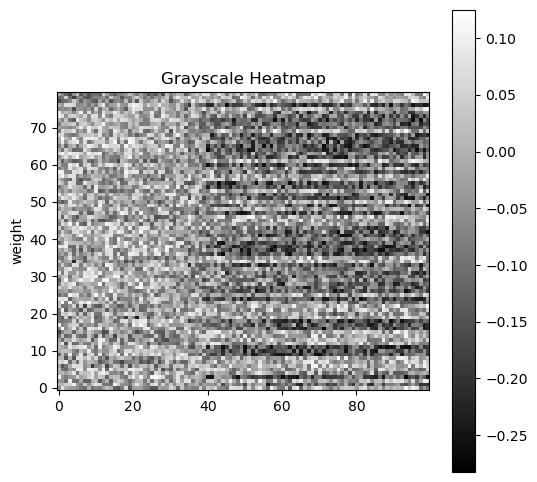

In [89]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [90]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-1.5700154e+00, -6.6974580e-01, -1.6995088e+00, -9.2827119e-02,
       -7.3478174e-01, -1.0930980e+00, -1.3959051e+00, -2.1192620e+00,
       -5.4671913e-03, -8.8140655e-01, -1.0037425e+00, -8.7319350e-01,
       -1.9204359e+00, -1.8989514e+00, -1.0044813e+00, -1.4738617e+00,
       -6.4538157e-01, -3.2462027e+00, -8.2829881e-01, -1.3409085e+00,
       -3.7081331e-01, -9.9379373e-01, -7.5481290e-01, -2.2842088e+00,
       -3.0144758e+00, -1.2970533e+00, -1.4062417e+00, -1.4212471e+00,
       -2.0113463e+00, -1.0620872e+00, -2.6567829e+00, -2.5202520e+00,
       -1.1744503e+00, -1.1368244e+00, -2.7629318e+00, -3.1596916e+00,
       -2.7026281e+00, -2.4754262e+00, -2.6085119e+00, -3.9271164e+00,
       -4.9062142e+00, -4.3737116e+00, -3.6046984e+00, -5.4380016e+00,
       -5.0046501e+00, -6.2901363e+00, -5.1226840e+00, -5.8452506e+00,
       -5.1256962e+00, -5.8689127e+00, -5.7450333e+00, -5.3343625e+00,
       -5.5359564e+00, -4.6517811e+00, -5.7733679e+00, -6.1726193e+00,
      

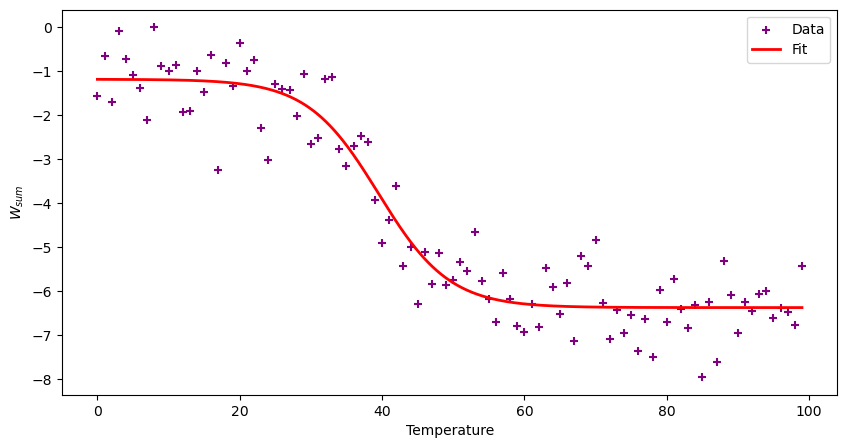

Fitted Parameters:
a: -2.593612772738316
b: 0.10022630377073198
c: -3.9577283260205047
d: -3.7810211947791736


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.xlabel('Temperature')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [92]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 39.48792060688801
beta: 0.5190943079344493
